# $2^{nd}$ exercises

## Notebook setup

#### Used libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

#### Functions

In [2]:
#Load and print config files
def LoadConf(path):
    d={}
    with open(path) as file:
        for line in file:
            (directive,key, val) = line.split()
            if(directive=="#define"): d[key] = int(val)
    return d

def PrintConf(d):
    for key, val in d.items(): print("{0:<19}{1}".format(key,val))
        
#Plot shortcuts
def PlotSetup():
    plt.axes().set_facecolor(bg1)
    plt.grid(alpha=0.3)

def MultiplotSetup(fig,r,c):
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        fig.axes[i].set_facecolor(bg1)
        plt.grid(alpha=0.3) 
    
def Legend():
    leg = plt.legend(facecolor=bg2)
    for text in leg.get_texts():
        text.set_color(el1)
        
def Errbar1Sigma(x,y,e):
    plt.vlines(x,y-e,y+e,color=er1,alpha=0.8, label="$1\sigma$")
    plt.plot(x,y,color=el1)
    
def Errbar2Sigma(x,y,e):
    plt.vlines(x,y-e,y+e,color=er1,alpha=0.8, label="$1\sigma$")
    plt.vlines(x,y-2*e,y+2*e,color=er2,alpha=0.4, label="$2\sigma$")
    plt.plot(x,y,color=el1)

#### Colors

In [3]:
#background
bg1 = "#191724" 
bg2 = "#26233a" 
#elements
el1 = "#e0def4" 
el2 = "#f6c177" 
el3 = "#eb6f92" 
#errorbars
er1 = "#908caa"  
er2 = "#6e6a86"

## 02.1 - Integrals

### Introductory notes
Montecarlo methods can be used to evaluate integrals. A possible method is the uniform sampling. The idea is to rewrite the target integral in the following way:
\begin{equation}
    I=\int_{\Omega}f(x) dx=\int_{\Omega}g(x)p(x) dx\quad\text{where}\quad p(x)>0\,\,\forall x\in\Omega,\,\,\int_\Omega p(x) dx=1
\end{equation}
That is $I=\langle g \rangle$ with the measure $p(x)dx$. Now if one takes into account the quantity $G_N=\sum_i g(x_i)/N$, with $x_i$ distributed according to $p$, thanks to central limit theorem we have $\langle G_N \rangle = \langle g \rangle = I$. The easyest choice is to take $p(x)=1/\mu(\Omega)$ and $g(x)=\mu(\Omega)f(x)$, being $\mu(\Omega)$ the measure of the set. We call this choice uniform sampling.

One could argue that this is not the best choice for $p$: this observation leads to what is called importance sampling. The idea is to rewrite again the target integral as
\begin{equation}
    I=\int_{\Omega}\biggl[\frac{g(x)p(x)}{d(x)}\biggr]d(x) dx\quad\text{where}\quad d(x)>0\,\,\forall x\in\Omega,\,\,\int_\Omega d(x) dx=1
\end{equation}
and to minimize
\begin{equation}
    \sigma^2_I(d)=\int_{\Omega}\biggl[\frac{g(x)p(x)}{d(x)}\biggr]^2d(x) dx -I^2 
\end{equation}
Using lagrange multipliers to keep track of the normalization constraint on $d$ and the functional derivative one get that the minimizing pdf is 
\begin{equation}
    d^*=\frac{|pg|}{\int_{\Omega}|g(x)p(x)|dx}
\end{equation}
if $g(x)>0$ we have $d^*=pg/I=f/I$. Clearly $\sigma_I(d^*)=0$ (but a knowledge of $d^*$ requires the knowledge of $I$) and we can expect that by choosing $d$ similar to $d^*$, that is similar to $f$, we would get $\sigma_i<<1$.

We can apply those methods to
\begin{equation}
    I = \int_0^1 \frac{\pi}{2}\cos\Bigl(\frac{\pi}{2} x \Bigr) dx = 1
\end{equation}
Since $\Omega=[0,1]$ uniform sampling is immediate. As of importance sampling, one could try with a Taylor expansion of the integrand in 0, proportional to $1-\pi^2/8 x^2$. We notice however that it changes sign in the domain of integration, so it's not suited to play the role of our the $d(x)$. A better choiche is the taylor expansion in 1, $2(1-x)$, which is always positive in the domain of integration and can be sampled using the inverse of the cumulative method using the formula $1-\sqrt{1-y}$.

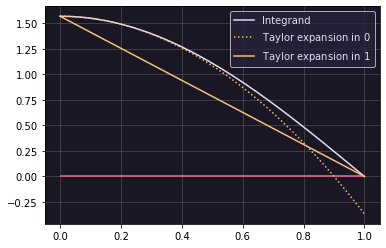

In [4]:
x  = np.linspace(0, 1, 1000)
f  = np.pi/2 * np.cos(np.pi/2 * x)
f0 = np.pi/2 * (1 - np.pi**2/8 * x**2)
f1 = np.pi/2 * (1 - x)

PlotSetup()
plt.hlines(0, 0, 1, color=el3)
plt.plot(x, f, color=el1, label="Integrand")
plt.plot(x, f0, ":", color=el2,  label="Taylor expansion in $0$")
plt.plot(x, f1,color=el2, label="Taylor expansion in $1$")
Legend()
plt.show()



 Higher order expansions suffers from the fact that they can be sampled only by an accept-reject method.


### Excercise goal
**Goal:** Evaluate $\int_0^1 \frac{\pi}{2} cos(\frac{\pi}{2}x) dx$ using uniform and importance sampling.

**Expectations:** We expect the results to be compatible with $1$.

###  Results
We divided the estimation in `N_BLOCKS` blocks with `STEPS_PER_BLOCK` steps each - 
with:

In [5]:
conf=LoadConf("in/021-conf.inl")
PrintConf(conf)

N_BLOCKS           100
STEPS_PER_BLOCK    1000


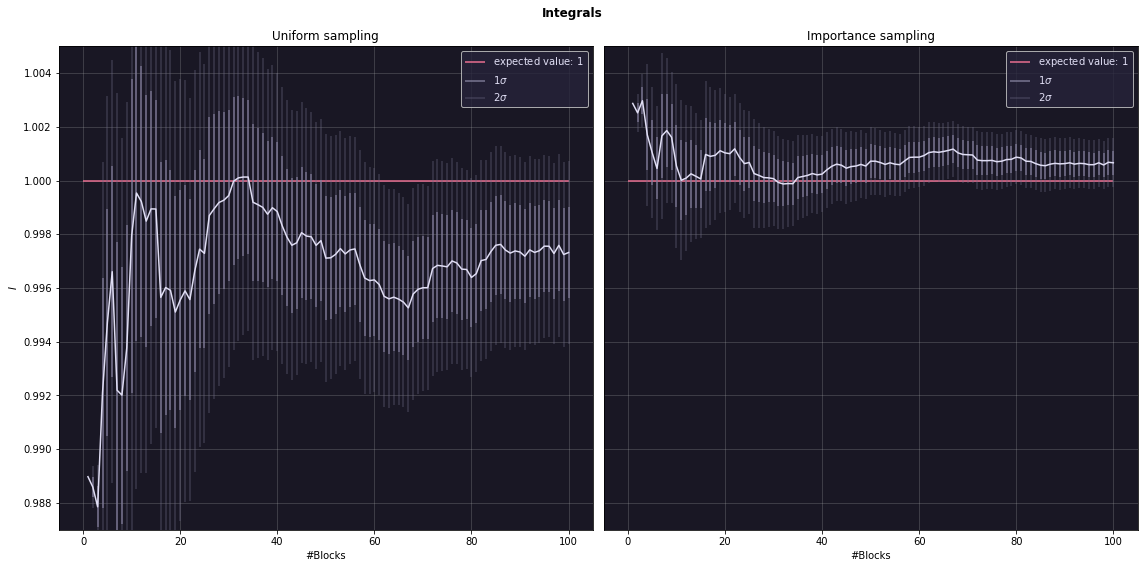

Uniform sampling (last block): 0.9973 ± 0.0017
Importance sampling (last block): 1.0007 ± 0.0005


In [6]:
y_inf=0.987
y_sup=1.005

fig=plt.figure(figsize=(16, 8))
MultiplotSetup(fig,1,2)
plt.suptitle('Integrals', weight='bold')

#uniform 
plt.subplot(121)
plt.title("Uniform sampling")
plt.xlabel('#Blocks')
plt.ylabel('$I$')

data = np.genfromtxt("out/021-uniform.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,2]
e=data[:,3]

plt.ylim(y_inf,y_sup)
plt.hlines(1, 0, conf["N_BLOCKS"],color=el3, label="expected value: $1$")
Errbar2Sigma(x,y,e)

Legend()

ye_unif=[y[-1],e[-1]]

#importance 
plt.subplot(122)
plt.title("Importance sampling")
plt.tick_params(left=False,labelleft=False)
plt.xlabel('#Blocks')

data = np.genfromtxt("out/021-importance.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,2]
e=data[:,3]

plt.ylim(y_inf,y_sup)
plt.hlines(1, 0, conf["N_BLOCKS"],color=el3,label="expected value: $1$")
Errbar2Sigma(x,y,e)

Legend()

ye_impo=[y[-1],e[-1]]


plt.tight_layout()
plt.show()

dp=4
y_impo=round(ye_impo[0],dp)
e_impo=round(ye_impo[1],dp)
y_unif=round(ye_unif[0],dp)
e_unif=round(ye_unif[1],dp)
print(f"Uniform sampling (last block): {y_unif} ± {e_unif}")
print(f"Importance sampling (last block): {y_impo} ± {e_impo}")

As expected, both method are compatible with the exact value of the intregral and, as we can see, the standard deviation using importance sampling is more than 3 times smaller than the standard deviation using uniform sampling.

## 02.2 - Random walk

### Introductory notes
A random walk is the trajectory that emerges from a succession of random steps. It can be shown that in the continuum limit the probability of being in the position $r$ at time $t$ follows a diffusive differential equation. A nice way to visualize, at least in 1D, the fact that a random walk is a diffusive process is the following. Let's consider a 1D unbiased random walk (that is: with 50% chance of moving to the left or to the right) on a lattice with side-lenght 1. The position at step n is given by
\begin{equation}
r_n=\sum_{i=1}^n x_i
\end{equation}
where $x_i$ is equally likely to be $\pm 1$. We whish to know how far from the origin we get, on average, after n steps. Because of equal probability of moving to the left or to the right $\langle r_n \rangle=0$ no matter the number of steps. A better estimator is $\langle r_n^2 \rangle$ because, by squaring, we are getting rid of the information about the verse towards which the random walk is moving. Squaring a sum, we are going to find the sum of terms in the form: $x_i^2$, $x_ix_j$ for $i\neq j$. For the mixed terms we have four possible values:
- $x_i=+1, x_j=+1 \rightarrow +1$ 
- $x_i=-1, x_j=+1 \rightarrow -1$ 
- $x_i=+1, x_j=-1 \rightarrow -1$ 
- $x_i=-1, x_j=-1 \rightarrow +1$ 

They are equally likely to be $\pm 1$ and thus on average they won't contribute. On the other hand, the $n$ squared terms are always equal to $1$. To conclude we find that
\begin{equation}
\langle r_n \rangle = n
\end{equation}
It means that on average the distance from the origin grows with the number of steps.

In this excercise we aim to see the diffusion process in action for a 3D random walk on a discrete lattice and for a 3D random walk in the continuum.
Sampling the discrete random walk is easy: it's sufficent to generate uniformly two random number, one to chose the direction and the other to chose the verse of the move. For the continuous random walk we also need two numbers, representing the two relevant 3D angles, but we need to be careful: while the polar angle $\varphi$ is sampled uniformly in $[0,2\pi)$, for the azimuthal angle $\theta$ we need to keep in mind that its measure is $\sin\theta d\theta$ so, evaluating the normalization, we have that the pdf of $\theta$ is $p(\theta)=\frac{1}{2}\sin\theta\chi_{[0,\pi]}(\theta)$ with $\chi_I$ the charateristic function of the interval $I$. Using the inverse of the cumulative method we get $\theta=\cos^{-1}(1-2y)$ where $y$ is uniformly sampled in $[0,1)$

### Excercise goal
**Goal:** Evaluate $\sqrt{\langle |\vec{r}|^2 \rangle}$ (where $r$ is the distance from the origin) in function of the steps of an isotropic random walks, with steps of fixed lenght, on a cubic lattice and in the continuum.

**Expectations:** We expect to observe a diffusive behaviour.

### Results
We divided the estimation in `N_BLOCKS` blocks with `RW_PER_BLOCK` random walks per block. The simulation lasted for `RW_STEPS` steps. The steps lenght was fixed to `LATTICE_DIM` - where:

In [7]:
conf=LoadConf("in/022-conf.inl")
PrintConf(conf)

N_BLOCKS           100
RW_PER_BLOCK       1000
RW_STEPS           100
LATTICE_DIM        1


#### Discrete

In [8]:
def f(x,k):
    return k * np.sqrt(x)

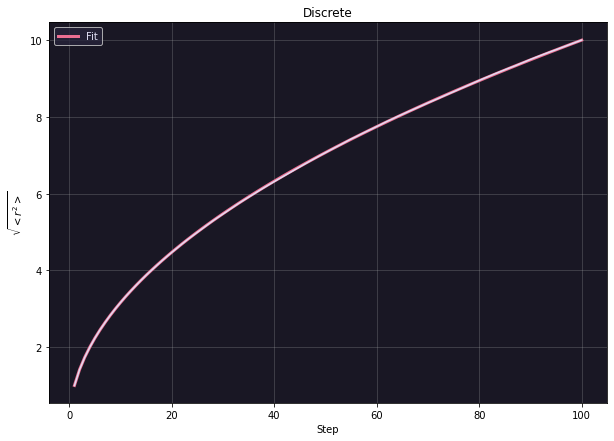

Fit: (1.001 ± 0.0001) * √x


In [9]:
fig=plt.figure(figsize=(10, 7))
PlotSetup()

plt.title("Discrete")
plt.xlabel('Step')
plt.ylabel('$\sqrt{<r^2>}$')

data = np.genfromtxt("out/022-discreterw.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,1]
e=data[:,2]

plt.errorbar(x,y,e,color=el1)

popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color=el3, label='Fit',linewidth=3)

Legend()

plt.show()

dp=4
k=round(popt[0],dp)
sigma=round(np.sqrt(pcov[0,0]),dp)
print(f"Fit: ({k} ± {sigma}) * √x")

#### Continuous

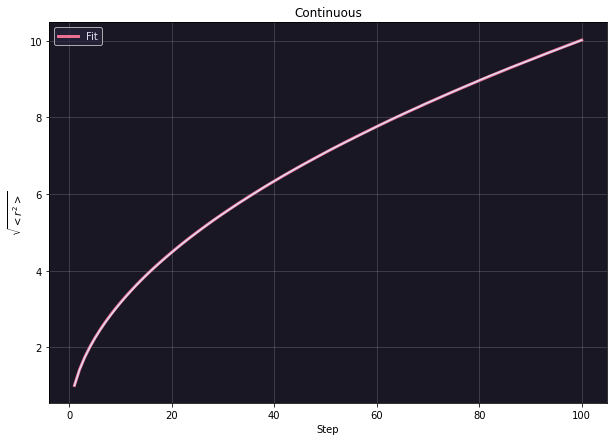

Fit: (1.0019 ± 0.0001) * √x


In [10]:
fig=plt.figure(figsize=(10, 7))
PlotSetup()

plt.title("Continuous")
plt.xlabel('Step')
plt.ylabel('$\sqrt{<r^2>}$')

data = np.genfromtxt("out/022-continuousrw.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,1]
e=data[:,2]

plt.errorbar(x,y,e,color=el1)

popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color=el3, label='Fit',linewidth=3)

Legend()

plt.show()

dp=4
k=round(popt[0],dp)
sigma=round(np.sqrt(pcov[0,0]),dp)
print(f"Fit: ({k} ± {sigma}) * √x")